In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv('/Users/Minhaj Siddiqui/Downloads/fifadataset.csv')
print(data.head())

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   

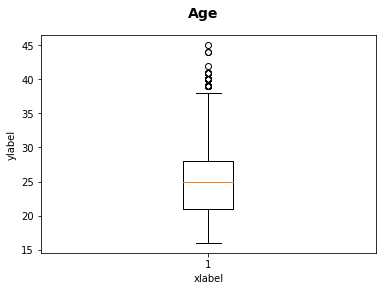

[40, 40, 41, 40, 40, 40, 40, 41, 45, 41, 40, 40, 42, 41, 40, 40, 41, 40, 40, 44, 40, 44]


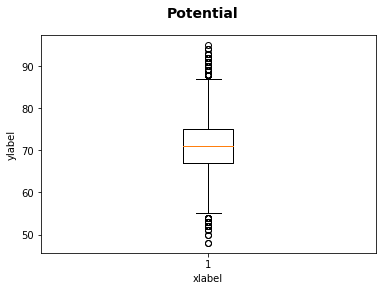

[94, 94, 93, 93, 92, 91, 91, 91, 91, 93, 90, 90, 90, 90, 90, 94, 91, 90, 92, 90, 95, 90, 91, 91, 92, 90, 90, 91, 92, 91, 90, 91, 92, 90, 92, 90, 90, 90, 90, 90, 92, 92, 90, 91, 91, 90, 93, 90, 90, 92, 52, 52, 52, 52, 52, 52, 52, 51, 50, 50, 51, 52, 52, 52, 48, 48]


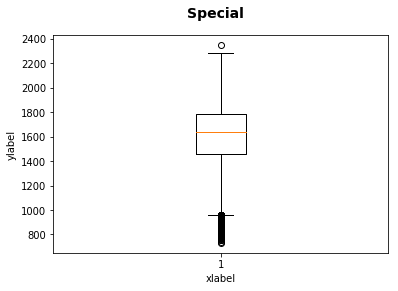

[780, 755, 770, 775, 752, 780, 774, 760, 752, 771, 757, 772, 773, 778, 738, 774, 731]


In [2]:
#finding outliers in numeric columns
from pylab import *
import numpy as np
import pandas as pd


#function to calculate outliers

def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            #data_1.replace(y,np.NaN,inplace=True)
            outliers.append(y)
    return outliers



fig = plt.figure()
fig.suptitle('Age', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(data['Age'])

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()
outliers_age = detect_outlier(data['Age'])
print(outliers_age)




fig = plt.figure()
fig.suptitle('Potential', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(data['Potential'])

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()
outliers_potential = detect_outlier(data['Potential'])
print(outliers_potential)




fig = plt.figure()
fig.suptitle('Special', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(data['Special'])

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()
outliers_special = detect_outlier(data['Special'])
print(outliers_special)




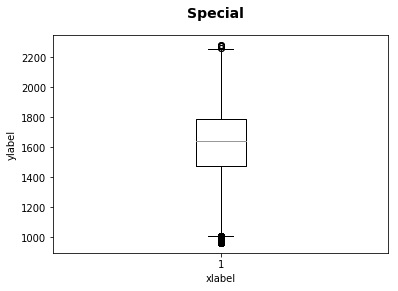

In [3]:
#removing outliers

Q1 =  data['Special'].quantile(0.25)
Q3 = data['Special'].quantile(0.75)
IQR = Q3 - Q1
data = data[data.loc[:,'Special'] < Q3+1.5*IQR]
data = data[data.loc[:,'Special'] > Q1-1.5*IQR]

fig = plt.figure()
fig.suptitle('Special', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(data['Special'])

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()


In [4]:
#finding any column with spaces 
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17659 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  17659 non-null int64
ID                          17659 non-null int64
Name                        17659 non-null object
Age                         17659 non-null int64
Photo                       17659 non-null object
Nationality                 17659 non-null object
Flag                        17659 non-null object
Overall                     17659 non-null int64
Potential                   17659 non-null int64
Club                        17422 non-null object
Club Logo                   17659 non-null object
Value                       17659 non-null object
Wage                        17659 non-null object
Special                     17659 non-null int64
Preferred Foot              17611 non-null object
International Reputation    17611 non-null float64
Weak Foot                   17611 non-null float64
Skill Moves                 17611 non-null fl

In [6]:
#finding missing values and replacing them

col = data.columns
numeric_col = data._get_numeric_data().columns
cat_col = set(col) - set(numeric_col)
numeric_col_list = list(numeric_col)
cat_col_list  = list(cat_col)

for column in numeric_col_list:
    data[column] =  data[column].fillna(data[column].median())
    
for column in cat_col_list:
    data[column] =  data[column].fillna(data[column].mode()[0])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17659 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  17659 non-null int64
ID                          17659 non-null int64
Name                        17659 non-null object
Age                         17659 non-null int64
Photo                       17659 non-null object
Nationality                 17659 non-null object
Flag                        17659 non-null object
Overall                     17659 non-null int64
Potential                   17659 non-null int64
Club                        17659 non-null object
Club Logo                   17659 non-null object
Value                       17659 non-null object
Wage                        17659 non-null object
Special                     17659 non-null int64
Preferred Foot              17659 non-null object
International Reputation    17659 non-null float64
Weak Foot                   17659 non-null float64
Skill Moves                 17659 non-null fl

In [7]:
#Adding a new column called GeneralPosition
#GeneralPosition labels: Attacker, Midfielder, Defender, Goalkeeper

attackers = ['RF','ST','LW','LF','RS','LS','RW','CF']
midfielders = ['RCM','LCM','LDM','CAM','CDM','RM','LAM','LM','RDM','CM','RAM']
defenders = ['RCB','CB','LCB','LB','RB','RWB','LWB']
data['GeneralPosition'] = ""


data['GeneralPosition'] = np.where(data['Position'].isin(attackers),'attacker',
np.where(data['Position'].isin(midfielders),'midfielder',
np.where(data['Position'].isin(defenders),'defender','goal keeper')))

data[['Name','GeneralPosition']].head(10)

,Name,GeneralPosition
0,L. Messi,attacker
1,Cristiano Ronaldo,attacker
2,Neymar Jr,attacker
3,De Gea,goal keeper
4,K. De Bruyne,midfielder
5,E. Hazard,attacker
6,L. Modrić,midfielder
8,Sergio Ramos,defender
9,J. Oblak,goal keeper
10,R. Lewandowski,attacker


In [8]:
features_selection = ['ID','Age','Finishing','HeadingAccuracy','Volleys','Dribbling','Curve',
                 'FKAccuracy','Acceleration','SprintSpeed','ShotPower','LongShots','Interceptions',
                'Penalties','Marking','StandingTackle','SlidingTackle',
                 'GKDiving','GKHandling','GKKicking','GKReflexes','GeneralPosition']
X = pd.DataFrame(data, columns = features_selection)
X.head()

,ID,Age,Finishing,HeadingAccuracy,Volleys,Dribbling,Curve,FKAccuracy,Acceleration,SprintSpeed,...,Interceptions,Penalties,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKReflexes,GeneralPosition
0,158023,31,95.0,70.0,86.0,97.0,93.0,94.0,91.0,86.0,...,22.0,75.0,33.0,28.0,26.0,6.0,11.0,15.0,8.0,attacker
1,20801,33,94.0,89.0,87.0,88.0,81.0,76.0,89.0,91.0,...,29.0,85.0,28.0,31.0,23.0,7.0,11.0,15.0,11.0,attacker
2,190871,26,87.0,62.0,84.0,96.0,88.0,87.0,94.0,90.0,...,36.0,81.0,27.0,24.0,33.0,9.0,9.0,15.0,11.0,attacker
3,193080,27,13.0,21.0,13.0,18.0,21.0,19.0,57.0,58.0,...,30.0,40.0,15.0,21.0,13.0,90.0,85.0,87.0,94.0,goal keeper
4,192985,27,82.0,55.0,82.0,86.0,85.0,83.0,78.0,76.0,...,61.0,79.0,68.0,58.0,51.0,15.0,13.0,5.0,13.0,midfielder


In [9]:
#looking for duplicate data, invalid data or corrupt data and remove it
X.isnull().sum()

ID                 0
Age                0
Finishing          0
HeadingAccuracy    0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
Acceleration       0
SprintSpeed        0
ShotPower          0
LongShots          0
Interceptions      0
Penalties          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKReflexes         0
GeneralPosition    0
dtype: int64

In [10]:
y = X['GeneralPosition']
X = X.drop('GeneralPosition',1)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

y

array([0, 0, 0, ..., 0, 0, 3])

In [12]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


In [17]:
#Feature scaling 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


X_train = min_max_scaler.fit_transform(X_train)  
X_test = min_max_scaler.fit_transform(X_test) 

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# k-NN classifier with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
x_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

# Print the accuracy
print('Train accuracy of the model: ',accuracy_score(y_train,x_pred)*100)
print('Test accuracy of the model: ',accuracy_score(y_test,y_pred)*100)


Train accuracy of the model:  85.97012812345154
Test accuracy of the model:  83.15402038505097


In [22]:
# Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

nb = GaussianNB()
nb.fit(X_train, y_train)
x_pred = nb.predict(X_train)
y_pred = nb.predict(X_test)

print('Train accuracy of the model: ',accuracy_score(y_train,x_pred)*100)
print ("Test accuracy of the model: ", accuracy_score(y_test,y_pred)*100) 


Train accuracy of the model:  76.4564309478304
Test accuracy of the model:  76.7836919592299
